<a href="https://colab.research.google.com/github/TejaswiReddySandi/deep-learning-assignments/blob/main/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy pandas mnist

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [ ]:
import numpy as np

In [ ]:
from keras.datasets import fashion_mnist

from tensorflow.keras.utils import to_categorical

In [ ]:
#2 PREPARING THE DATA
# [0,255] TO [-0.5 TO 0.5] --> NETWORK EASIER, SMALLER AND CENTERED VALUES

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(test_images.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#NORMALISING THE IMAGE
train_images = (train_images/255)-0.5
test_images = (test_images/255)-0.5

In [ ]:
#RESHAPING
train_images = np.expand_dims(train_images,axis=3)
test_images = np.expand_dims(test_images,axis=3)
#printing
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#BUILDING THE MODEL
from keras.models import Sequential
#with import packages
model = Sequential([])

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
#applying no of filters
num_filters = 8
filter_size = 3
pool_size = 3
#hyperparameters nf, fs, ps
model = Sequential([Conv2D(num_filters,filter_size,input_shape=(28,28,1)),MaxPooling2D(pool_size=pool_size),Flatten(),Dense(10,activation="softmax")])

In [ ]:
#COMPILATION
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       ...,

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]], dtype=float32)

(60000, 28, 28)
(10000, 28, 28)


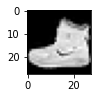

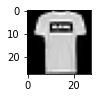

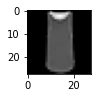

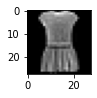

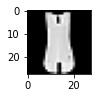

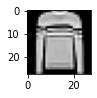

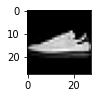

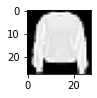

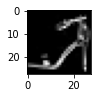

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Epoch 1/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5641 - accuracy: 0.8037 - val_loss: 0.4683 - val_accuracy: 0.8284
Epoch 2/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4177 - accuracy: 0.8538 - val_loss: 0.4243 - val_accuracy: 0.8459
Epoch 3/3
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3890 - accuracy: 0.8636 - val_loss: 0.4031 - val_accuracy: 0.8559


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

#2 PREPARING THE DATA
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(test_images.shape)

#plotting
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(train_images[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

#NORMALISING THE IMAGE
train_images = (train_images/255)-0.5
test_images = (test_images/255)-0.5

#RESHAPING
train_images = np.expand_dims(train_images,axis=3)
test_images = np.expand_dims(test_images,axis=3)
#printing
print(train_images.shape)
print(test_images.shape)

#BUILDING THE MODEL
model = Sequential([])

#applying no of filters
num_filters = 8
filter_size = 3
pool_size = 3
#hyperparameters nf, fs, ps
model = Sequential([Conv2D(num_filters,filter_size,input_shape=(28,28,1)),MaxPooling2D(pool_size=pool_size),Flatten(),Dense(10,activation="softmax")])

#COMPILATION
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#TRAINING THE DATA
model.fit(
    train_images,
    train_labels,
    epochs=3,
    validation_data=(test_images,test_labels),

    )

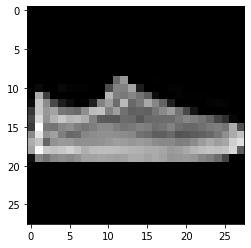

In [ ]:
import pylab as plt

plt.imshow(test_images[12:13].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
#saving the final model
model.save('final_model')

INFO:tensorflow:Assets written to: final_model/assets


In [ ]:
#evaluaing the model
_, acc = model.evaluate(test_images, test_labels, verbose=0)
print('> %.3f' % (acc * 100.0))

> 85.590


In [ ]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [ ]:
# predict the class

from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
img = Image.open(BytesIO(uploaded['sample_image.png']))

result = final_model.predict_classes(img)